In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Source: JHU
covid19 = pd.read_csv('https://raw.githubusercontent.com/soltaniehha/datasets/main/US-Covid-Cases.csv')

In [3]:
covid19

,province_state,fips,date,confirmed,deaths
0,Arizona,4001.0,2021-07-03,11506,437.0
1,Arizona,4003.0,2021-07-03,12210,293.0
2,Arizona,4005.0,2021-07-03,18060,331.0
3,Arizona,4007.0,2021-07-03,7107,229.0
4,Arizona,4009.0,2021-07-03,5596,85.0
...,...,...,...,...,...
2231184,South Carolina,45089.0,2020-08-31,1200,39.0
2231185,South Carolina,45053.0,2021-02-09,2025,39.0
2231186,South Carolina,45089.0,2020-09-15,1280,39.0
2231187,South Carolina,45029.0,2020-09-10,933,39.0


In [4]:
covid19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2231189 entries, 0 to 2231188
Data columns (total 5 columns):
 #   Column          Dtype  
---  ------          -----  
 0   province_state  object 
 1   fips            float64
 2   date            object 
 3   confirmed       int64  
 4   deaths          float64
dtypes: float64(2), int64(1), object(2)
memory usage: 85.1+ MB


In [5]:
covid19.dropna(subset=['fips'], inplace=True)
covid19.date = pd.to_datetime(covid19.date, format='%Y-%m-%d')
covid19.fips = covid19.fips.astype(int)
covid19.columns = ['state', 'county', 'date', 'confirmed', 'deaths']
covid19 = covid19.sort_values(['date', 'state', 'county'])
covid19

,state,county,date,confirmed,deaths
1024518,Alabama,1001,2020-03-22,0,0.0
1024866,Alabama,1003,2020-03-22,2,0.0
1024519,Alabama,1005,2020-03-22,0,0.0
1024520,Alabama,1007,2020-03-22,0,0.0
1024521,Alabama,1009,2020-03-22,0,0.0
...,...,...,...,...,...
1854625,Wyoming,56039,2022-02-11,9578,15.0
373260,Wyoming,56041,2022-02-11,5569,36.0
373261,Wyoming,56043,2022-02-11,2274,42.0
1898010,Wyoming,56045,2022-02-11,1524,17.0


In [6]:
covid19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2221697 entries, 1024518 to 1045234
Data columns (total 5 columns):
 #   Column     Dtype         
---  ------     -----         
 0   state      object        
 1   county     int64         
 2   date       datetime64[ns]
 3   confirmed  int64         
 4   deaths     float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 101.7+ MB


In [7]:
covid19.head(2)

,state,county,date,confirmed,deaths
1024518,Alabama,1001,2020-03-22,0,0.0
1024866,Alabama,1003,2020-03-22,2,0.0


In [8]:
covid19.describe()

,county,confirmed,deaths
count,2.221697e+06,2.221697e+06,2.221697e+06
mean,3.222000e+04,7.979743e+03,1.377644e+02
std,1.786238e+04,3.492647e+04,6.370581e+02
min,6.000000e+01,0.000000e+00,0.000000e+00
25%,1.903700e+04,2.680000e+02,3.000000e+00
50%,3.004900e+04,1.387000e+03,2.500000e+01
75%,4.702300e+04,4.683000e+03,8.300000e+01
max,9.999900e+04,2.752398e+06,2.976400e+04


In [9]:
covid19.date.min()

Timestamp('2020-03-22 00:00:00')

In [10]:
covid19.date.max()

Timestamp('2022-02-11 00:00:00')

In [11]:
# confirmed column is a cumulative sum - so the total sum gives us the incorrect total
covid19.confirmed.sum()

17728571840

In [12]:
covid_last_day = covid19[covid19.date == covid19.date.max()]
covid_last_day = covid_last_day.drop('date', axis=1)
covid_last_day.head(2)

,state,county,confirmed,deaths
223530,Alabama,1001,15216,173.0
223531,Alabama,1003,54301,626.0


In [13]:
# This should give us the total
covid_last_day.confirmed.sum()

77270357

In [14]:
bar_data = covid_last_day.groupby('state')[['confirmed']].sum().sort_values('confirmed', ascending=False).reset_index()
bar_data

,state,confirmed
0,California,8799757
1,Texas,6498479
2,Florida,5776333
3,New York,4878304
4,Illinois,2987502
5,Pennsylvania,2717577
6,Ohio,2628814
7,North Carolina,2525734
8,Georgia,2434131
9,Michigan,2287228


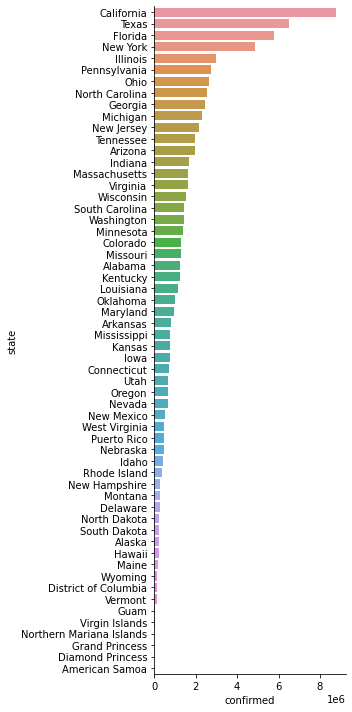

In [15]:
sns.catplot(data=bar_data, x='confirmed', y='state', kind='bar', 
            height=10, aspect=0.5);

In [16]:
covid19.date.max()

Timestamp('2022-02-11 00:00:00')

In [17]:
from datetime import timedelta
date_last_week = covid19.date.max() - timedelta(days=7)
covid_one_week_ago = covid19[covid19.date == date_last_week]
covid_one_week_ago = covid_one_week_ago.drop('date', axis=1)
covid_one_week_ago.head(2)

,state,county,confirmed,deaths
229754,Alabama,1001,14970,170.0
229755,Alabama,1003,53559,623.0


In [19]:
merged_df = pd.merge(covid_last_day, covid_one_week_ago, on=['state', 'county'], how='left', suffixes=('_0', '_7'))
merged_df.head(5)

,state,county,confirmed_0,deaths_0,confirmed_7,deaths_7
0,Alabama,1001,15216,173.0,14970,170.0
1,Alabama,1003,54301,626.0,53559,623.0
2,Alabama,1005,5402,87.0,5338,85.0
3,Alabama,1007,6294,97.0,6204,96.0
4,Alabama,1009,14516,212.0,14299,210.0


In [20]:
merged_df['confirmed'] = merged_df.confirmed_0 - merged_df.confirmed_7
merged_df['deaths'] = merged_df.deaths_0 - merged_df.deaths_7
merged_df.head(5)

,state,county,confirmed_0,deaths_0,confirmed_7,deaths_7,confirmed,deaths
0,Alabama,1001,15216,173.0,14970,170.0,246,3.0
1,Alabama,1003,54301,626.0,53559,623.0,742,3.0
2,Alabama,1005,5402,87.0,5338,85.0,64,2.0
3,Alabama,1007,6294,97.0,6204,96.0,90,1.0
4,Alabama,1009,14516,212.0,14299,210.0,217,2.0


In [21]:
covid_last_7_days = merged_df[['state', 'county', 'confirmed', 'deaths']]
covid_last_7_days.head(2)

,state,county,confirmed,deaths
0,Alabama,1001,246,3.0
1,Alabama,1003,742,3.0


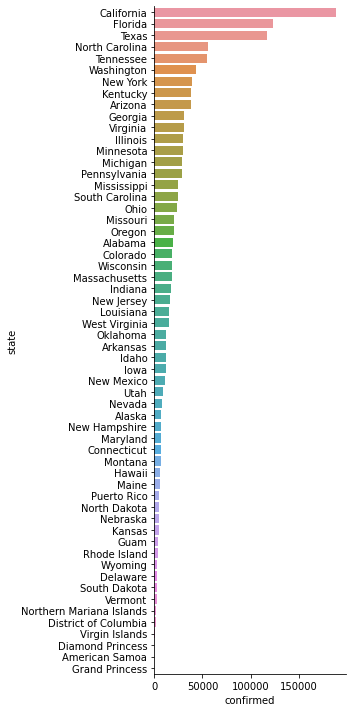

In [22]:
covid_last_7_days_state = covid_last_7_days.groupby('state')[['confirmed', 'deaths']].sum().sort_values('confirmed', ascending=False).reset_index()
sns.catplot(data=covid_last_7_days_state, x='confirmed', y='state', kind='bar', 
            height=10, aspect=0.5);

In [23]:
us_pop = pd.read_csv('https://raw.githubusercontent.com/soltaniehha/datasets/main/US_Population_By_State_2019.csv')
us_pop.head()

,STATE,POPULATION
0,Alabama,4903185
1,Alaska,731545
2,Arizona,7278717
3,Arkansas,3017804
4,California,39512223


In [24]:
df_7 = covid_last_7_days_state.merge(us_pop, how='right', left_on='state', right_on='STATE')
df_7.drop('STATE', axis=1, inplace=True)
df_7.head(2)

,state,confirmed,deaths,POPULATION
0,Alabama,19084,134.0,4903185
1,Alaska,7190,21.0,731545


In [25]:
df_7['confirmed_per_m'] = df_7['confirmed'] / df_7['POPULATION'] * 1000000
df_7['deaths_per_m'] = df_7['deaths'] / df_7['POPULATION'] * 1000000
df_7.sort_values('confirmed_per_m', ascending=False, inplace=True)
df_7.head(2)

,state,confirmed,deaths,POPULATION,confirmed_per_m,deaths_per_m
1,Alaska,7190,21.0,731545,9828.513625,28.706368
17,Kentucky,38514,237.0,4467673,8620.595106,53.047750


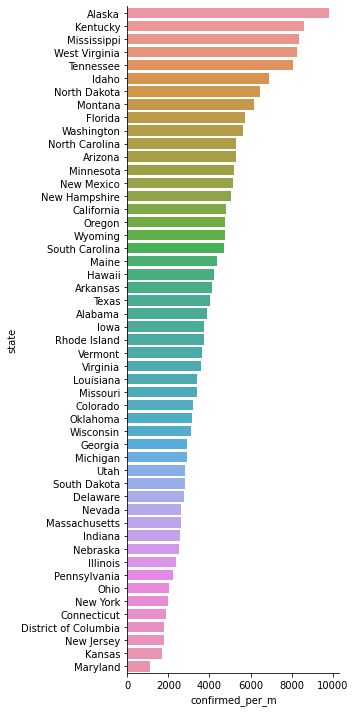

In [26]:
sns.catplot(data=df_7, x='confirmed_per_m', y='state', kind='bar', 
            height=10, aspect=0.5);

In [27]:
us_vax = pd.read_csv('https://raw.githubusercontent.com/soltaniehha/datasets/main/us_state_vaccinations.csv')
us_vax.head(5)

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
0,2021-01-12,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,NaN,NaN,NaN,0.207,NaN,NaN
1,2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222,NaN,NaN
2,2021-01-14,Alabama,92300.0,435350.0,80480.0,NaN,1.88,NaN,1.64,8.88,8260.0,7083.0,1445.0,0.212,NaN,NaN
3,2021-01-15,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226,NaN,NaN
4,2021-01-16,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7498.0,1529.0,NaN,NaN,NaN


In [28]:
us_vax.date.max()

'2022-02-11'

In [29]:
us_vax = us_vax[us_vax.date == us_vax.date.max()]
us_vax = us_vax[['location', 'people_fully_vaccinated_per_hundred']]
us_vax.columns = ['state', 'vax_rate']
us_vax.head(2)

,state,vax_rate
395,Alabama,49.82
791,Alaska,59.94


In [30]:
df_7 = df_7.merge(us_vax)
df_7.head()

,state,confirmed,deaths,POPULATION,confirmed_per_m,deaths_per_m,vax_rate
0,Alaska,7190,21.0,731545,9828.513625,28.706368,59.94
1,Kentucky,38514,237.0,4467673,8620.595106,53.047750,56.01
2,Mississippi,24855,308.0,2976149,8351.396385,103.489442,50.50
3,West Virginia,14816,146.0,1792147,8267.178976,81.466531,56.46
4,Tennessee,54986,341.0,6829174,8051.632599,49.932832,53.07


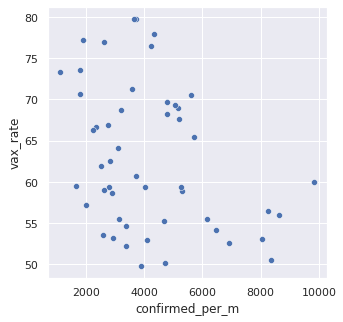

In [31]:
sns.set(rc={'figure.figsize':(5,5)})
sns.scatterplot(data=df_7, x='confirmed_per_m', y='vax_rate');

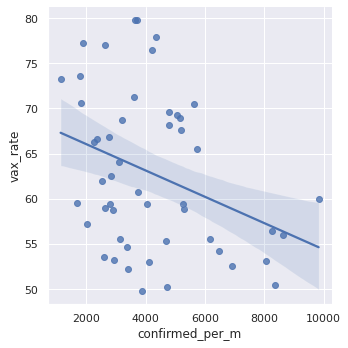

In [32]:
sns.lmplot(x="confirmed_per_m", y="vax_rate", data=df_7);

In [37]:
# Correlation
df_7['confirmed_per_m'].corr(df_7['vax_rate'])

-0.33721801882494185

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


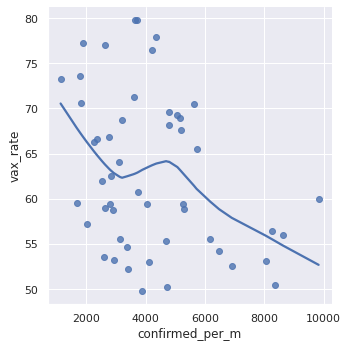

In [33]:
sns.lmplot(x="confirmed_per_m", y="vax_rate", data=df_7,
           lowess=True);

In [34]:
# Install and import the package
!pip install plotly_express -q
import plotly_express as px

In [35]:
fig = px.scatter(df_7, x="confirmed_per_m", y="vax_rate", color="state")
fig.show()

In [38]:
abbrevs = pd.read_csv('https://raw.githubusercontent.com/soltaniehha/Business-Analytics/master/data/state-abbrevs.csv')
abbrevs.head(1)

,state,abbreviation
0,Alabama,AL


In [39]:
df_7 = df_7.merge(abbrevs)
df_7.head(1)

,state,confirmed,deaths,POPULATION,confirmed_per_m,deaths_per_m,vax_rate,abbreviation
0,Alaska,7190,21.0,731545,9828.513625,28.706368,59.94,AK


In [40]:
import plotly.express as px

px.scatter_geo(df_7, 
               locations='abbreviation', 
               locationmode='USA-states',
               color='confirmed_per_m', 
               size='vax_rate', 
               hover_name='state', 
               scope='usa'
               )

In [41]:
import plotly.express as px

px.choropleth(df_7, 
               locations='abbreviation', 
               locationmode='USA-states',
               color='confirmed_per_m', 
               hover_name='state', 
               scope='usa'
               )

# COVID-19 Mortality

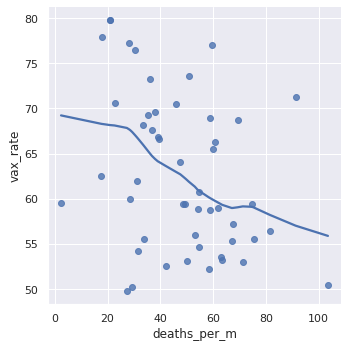

In [42]:
sns.lmplot(x="deaths_per_m", y="vax_rate", data=df_7,
           lowess=True);

In [43]:
# Correlation
df_7['deaths_per_m'].corr(df_7['vax_rate'])

-0.35053378998999285